In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Here, we can visualize the data and notice the different features we are working with
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
#13 features for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
#Clean Data 

data.set_index(keys='Unnamed: 0',inplace=True)
l = dict(data.dtypes)
to_drop = [] 
for i in l: 
    if l[i] == 'object': 
        to_drop.append(i)
to_drop

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [5]:
X = data.drop(to_drop,axis=1)

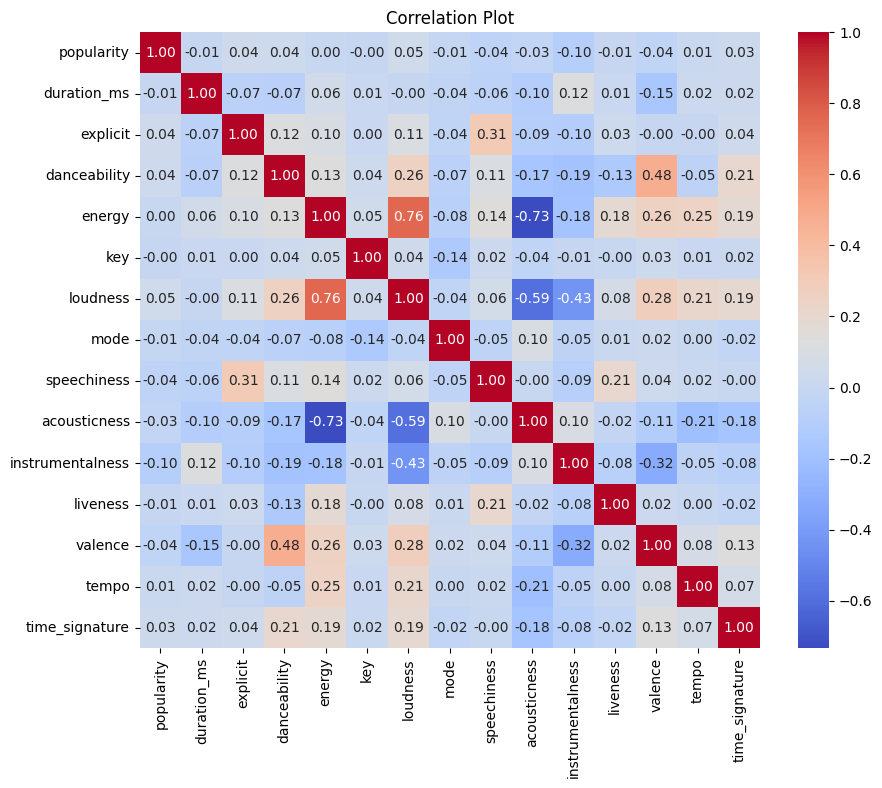

In [6]:
# Some of these features may be correlated, so we can run a correlation heatmap to detect some of these similarities 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

# Step 4: Plot Correlation Matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [7]:
'''
We always want to standardize the data so that we are comparing data on a leveled metric.

Dimension: 195 rows x 13 cols
'''

num = 0

# creating a copy of the original dataframe, so we can replace the cols here with the standardized colums
X_standard = X.copy()

for col in X.columns:
    # calculating mean and standard deviation
    mean = X[col].mean()
    std_dev = X[col].std()
    
    # this normalizes the data to produce a mean of 0, and standard deviation of 1 amongst all the differnt columns
    standardized_X = (X[col] - mean) / std_dev
    
    # populating into the new standardized matrix
    X_standard.iloc[:, num] = standardized_X
    num = num + 1

# Just to make it a nice visual
df = pd.DataFrame(X_standard)

df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,,,,,,,,,,,,,,,
0,1.782619,0.024575,-0.305766,0.629241,-0.717145,-1.210437,0.300827,-1.326275,0.551845,-0.850198,-0.504106,0.758740,0.929302,-1.141858,0.221822
1,0.975628,-0.730856,-0.305766,-0.845904,-1.889971,-1.210437,-1.784736,0.753985,-0.078993,1.831724,-0.504092,-0.591208,-0.798686,-1.489711,0.221822
2,1.065294,-0.160331,-0.305766,-0.742183,-1.122665,-1.491337,-0.293287,0.753985,-0.273825,-0.315497,-0.504110,-0.507165,-1.365682,-1.528305,0.221822
3,1.692954,-0.243213,-0.305766,-1.733297,-2.312984,-1.491337,-2.039243,0.753985,-0.457307,1.774585,-0.503881,-0.428374,-1.276969,1.987850,-2.089671
4,2.186115,-0.271918,-0.305766,0.295029,-0.788707,-0.929537,-0.282749,0.753985,-0.303144,0.463397,-0.504110,-0.686282,-1.184398,-0.073348,0.221822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.548688,1.462937,-0.305766,-2.274952,-1.615649,-0.086837,-1.617319,0.753985,-0.401505,0.977647,2.493744,-0.668423,-1.697780,0.128332,2.533315
113996,-0.503855,1.462947,-0.305766,-2.263427,-2.084780,-1.491337,-2.000073,-1.326275,-0.421367,2.042236,2.648805,-0.570197,-1.693537,-1.231189,0.221822
113997,-0.503855,0.404825,-0.305766,0.358414,-1.241935,-1.491337,-0.524133,-1.326275,-0.403397,1.660308,-0.504110,-0.681030,1.037301,0.341253,0.221822


In [8]:
'''
Calculating the covariance matrix, where each entry explains how two different variables, 
vary with each other.

We are trying to see how strong the variances of two variables from the same dataframe
are with each other, which is why we can multiply the standardized X with itself (transpose)
- Here, we need to have standardized values otherwise we would be comparing apples and oranges

Note: The values on the diagonals are just 1, because there is a perfect variance amongst the feature and itself
      Everywhere else along the matrix, it has a covariance value
      
Dimension: X^T * X = 13 rows x 195 cols times 195 rows x 13 cols = 13 rows x 13 cols (SQUARE MATRIX!)
'''

def covariance(x): 
    # here, x.T is the transpose of the matrix x, and x is the matrix itself
    # we are computing the inner product, and dividing by the number of elements - 1 --> (195 - 1 = 194)
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_standard) # np.cov(X_std.T)

# just to make it a neater visual
df = pd.DataFrame(cov_mat)

# Print DataFrame with gridlines
df


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


In [9]:
'''
Here, we will calculate the eigenvalues and the eigenvectors

1) The eigenvectors represent the orthogonal directions (vectors) in which the data varies the most
    a) Thus, it captures/creates the "axes" among which the data varies the most
    b) i.e. PRINCIPAL COMPONENTS
2) The eigenvalues represent the magnitude of the amount of variance captured by each eigenvector/principle component
   i.e. they represent the magnitude of spread along direction of the eigenvectors
    a) Thus, the larger eigenvalues correspond to eigenvectors that capture more variance in the data
        i) These are better for features extraction, dimensionality reduction!
        
3) Therefore, if we pick the top 5 largest eigenvalues, it will correspond to the 5 eigenvectors/principal comp.
that form 5 new axes for our data and explain the most variance  

Dimension: There are 13 eigenvalues (13 features), and each eigenvector has 13 elements
'''

from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.9979339  1.54641288 0.13973171 1.372918   0.32460017 0.44486499
 1.19866944 0.62025185 1.05795    1.02526656 0.74478841 0.95314618
 0.8922662  0.82836935 0.85283037]
Eigenvectors 
 [[ 0.03463907  0.02747506 -0.00267336 -0.03931534 -0.00634552  0.11713706
   0.02218081 -0.07476419 -0.77841347  0.45734995 -0.33486498  0.1344879
   0.09966615 -0.131738    0.06358528]
 [-0.01503788 -0.40602632 -0.01101073 -0.07208251 -0.02162033  0.08660561
  -0.16572905  0.04006554 -0.07319007 -0.22625834  0.1710624   0.48478509
   0.04511767 -0.51600511 -0.45103725]
 [ 0.12472181  0.17282545  0.01008854  0.48158081 -0.03699495  0.10289826
  -0.21733084  0.57924706 -0.34997585 -0.24978549  0.13481166 -0.23322054
  -0.06990931  0.1079631  -0.23206079]
 [ 0.25606038  0.45184523  0.15930555 -0.2042469  -0.05264141 -0.62480734
  -0.26816289  0.03249058 -0.00581601 -0.19812631 -0.30230061  0.12416972
  -0.0523337  -0.2155202  -0.04209751]
 [ 0.48927652 -0.27610256  0.73430349  0.05953012 -0.17

In [10]:
'''
Here, we will just combine the eigenvalue and its eigenvector into a tuple so they are paired together
And we will sort the eigenvalues, to see which eigenvectors we can use for our axes!

Dimension: There are 13 eigenvalues (13 features), and each eigenvector has 13 elements
'''

final_list = []
for i in range (len(eig_vals)):
    final_list.append((eig_vals[i], eig_vecs[i, :]))
sorted_eigenData = sorted(final_list, key=lambda x: x[0], reverse = True)
print(sorted_eigenData)

print('\n\n\n\n')
sorted_eig_vals = np.array([val[0] for val in sorted_eigenData])
sorted_eig_vecs = np.array([val[1] for val in sorted_eigenData])
print(sorted_eig_vals)


[(2.99793390106098, array([ 0.03463907,  0.02747506, -0.00267336, -0.03931534, -0.00634552,
        0.11713706,  0.02218081, -0.07476419, -0.77841347,  0.45734995,
       -0.33486498,  0.1344879 ,  0.09966615, -0.131738  ,  0.06358528])), (1.5464128760855336, array([-0.01503788, -0.40602632, -0.01101073, -0.07208251, -0.02162033,
        0.08660561, -0.16572905,  0.04006554, -0.07319007, -0.22625834,
        0.1710624 ,  0.48478509,  0.04511767, -0.51600511, -0.45103725])), (1.372917997300026, array([ 0.25606038,  0.45184523,  0.15930555, -0.2042469 , -0.05264141,
       -0.62480734, -0.26816289,  0.03249058, -0.00581601, -0.19812631,
       -0.30230061,  0.12416972, -0.0523337 , -0.2155202 , -0.04209751])), (1.198669440797328, array([ 0.49806948, -0.0997307 , -0.51521814, -0.03741044, -0.61938859,
       -0.08543445,  0.10903141, -0.09327141, -0.02738687,  0.07158722,
        0.12569057,  0.00673416, -0.17046125,  0.10059811, -0.05203246])), (1.0579499960339902, array([ 0.11205943,  0

In [ ]:
X

In [11]:
'''
This is where you can pick the number of dimensions/axes you want!

Looking at the data above, I felt that 10 eigenvalues were above 0.75, so these were probably the most significant, 
so I wanted to use only these eigenvectors

Dimension: There are 10 eigenvalues (reducing to 9 'features'), and each eigenvector has 13 elements
           10 rows x 13 cols
'''

# Select top k eigenvectors
k = 10
W = sorted_eig_vecs[:k, :] # loadings

print(W.shape)

#HERE, append last col of liked or disliked to W, and compare it without PCA to maybe random forests algorithm

(10, 15)


In [12]:
'''
These are the principal components corresponding to the 9 new "features" we are choosing to use

Each value next to a feature, can be treated as how much of that feature is measured in that principal compenent/eigenvector

Features with similar values can be seen to be similar features (ex. energy and loudness), which can also tell us 
about feature engineering
'''

for i, component in enumerate(sorted_eig_vecs):
    if (i == 10):
        break
    print(f"Principal Component {i+1} Loadings:")
    for j, feature in enumerate(component):
        print(f"{X.columns[j]}: {feature}")
    print()

Principal Component 1 Loadings:
popularity: 0.03463907148716941
duration_ms: 0.027475059892893665
explicit: -0.002673355469427448
danceability: -0.03931533811813989
energy: -0.006345522317581919
key: 0.11713705839321956
loudness: 0.022180810477007554
mode: -0.07476418792329556
speechiness: -0.7784134657692956
acousticness: 0.4573499536592873
instrumentalness: -0.33486498204395626
liveness: 0.1344879001455744
valence: 0.09966614620643507
tempo: -0.13173800103529493
time_signature: 0.06358528142135171

Principal Component 2 Loadings:
popularity: -0.015037882637082818
duration_ms: -0.4060263162613816
explicit: -0.011010727938461714
danceability: -0.07208251110366304
energy: -0.021620327672613904
key: 0.08660560939175958
loudness: -0.1657290459300072
mode: 0.04006553868327569
speechiness: -0.07319006542435334
acousticness: -0.22625834406817105
instrumentalness: 0.171062402246353
liveness: 0.48478508950958965
valence: 0.04511767111118059
tempo: -0.5160051098486905
time_signature: -0.4510372

In [14]:
n_samples, n_features = X.shape

Explained variance: [19.99 10.31  9.15  7.99  7.05  6.84  6.35  5.95  5.69  5.52  4.97  4.14
  2.97  2.16  0.93]
Cumulative explained variance: [ 19.99  30.3   39.45  47.44  54.49  61.33  67.68  73.63  79.32  84.84
  89.81  93.95  96.92  99.08 100.01]


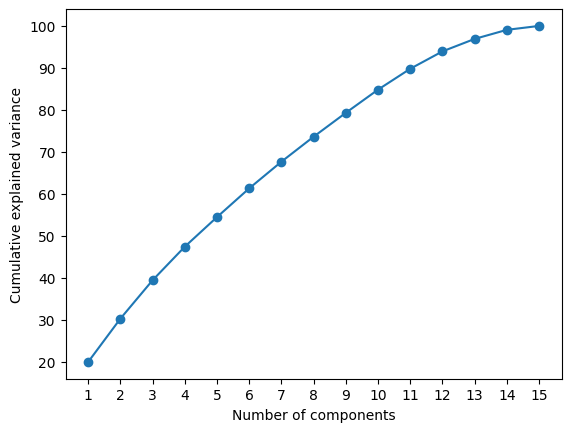

In [15]:
'''
We are using 9 components, however we can see a graph of how much variance would be explained if we chose a 
differrent number of components instead

Using all 13 components should explain 100% of the variance since this is all the features, however, our goal is
to reduce the dimensions

Using 9 components, takes us to around 92% of the variance explained which is good!
'''

eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eig_vals]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [16]:
'''
Now that we are using only 9 dimensions instead of 13, we need to project the orginal data into these 9 dimensions

Our original (standardized) data had 195 rows x 13 cols
We now want to project this data into dimensions of 195 rows x 9 cols (reduced dimensions)

We know our matrix of the extracted 9 eigenvectors/principal components/axes have dimensions 9 rows x 13 cols
Thus if we transpose this matrix, we get 13 rows x 9 cols

And: Original_Standardized_Matrix * Eigenvector_Matrix_Transpose = 195 rows x 13 cols times 13 rows x 9 cols = 
195 ROWS X 9 COLS!!

Thus we can project our original data, into the new dimensions we want by simply performing the following multiplication
'''

X_proj = X_standard.dot(W.T)


print(X_proj.shape)

# So now, X_proj will be our new, dimenson reduced matrix!

(114000, 10)


In [17]:
np.savetxt("PCA_data.csv", X_proj, delimiter=",")


# ***We finished applying the PCA from scratch. Pretty cool use of eigenvalues, eigenvectors, and matrix transformations!!***

In [ ]:
'''
Now, let's try using the in-build PCA function to see how it compares to the one we built from scratch!

You'll notice it produces the same eigenvectors and thus eigenvalues, and all the explained variances are the same
depending on the number of components you take!

And the explained variance graphs are the same!
'''

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 13).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)


plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

# Now, let's try to run a supervised learning model on the data!

In [ ]:
'''
This is the PCA, dimensionality reduced data
'''

X_proj

In [ ]:
'''
This is the normal, ORIGINAL, standardized data
'''

X_standard

In [ ]:
'''
We need to add on the classification column here so we can run a classification model
'''

X_proj['liked'] = data['liked']
X_standard['liked'] = data['liked']

In [ ]:
'''
Here is X_proj (PCA) with the column added
'''

X_proj

In [ ]:
'''
Here is X_standard (original) with the column added
'''

X_standard

In [ ]:
'''
Random Forest Classification Algorithm for PCA data - X_proj
'''
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_proj.iloc[:, 0:9], X_proj.iloc[:, 9], test_size = 0.30, random_state = 21)

rf = RandomForestClassifier(n_estimators = 2000, random_state = 21)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy1 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy1)

In [ ]:
'''
Random Forest Classification Algorithm for non-PCA, ORIGINAL data - X_standard
'''
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard.iloc[:, 0:13], X_standard.iloc[:, 13], test_size = 0.30, random_state = 21)

rf = RandomForestClassifier(n_estimators = 2000, random_state = 21)
# Train the model on training data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy2 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy2)

In [ ]:
'''
The percent difference between accuracies is
'''
percent_change = ((accuracy2-accuracy1)/accuracy2) * 100
print(f'{round(percent_change, 2)}%')
